## Draft of expanded model evaluation

This is the model evaluation we may send to reviewers as a response. Debby's ideas for analysis

In [221]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [222]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seawater
import netCDF4 as nc
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy
import gsw
import warnings
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)
import warnings
warnings.filterwarnings('ignore')

In [223]:
dset = 'COMB'
yr = 2013; 
fname = f'./extracted_calculated/YR{yr}_{dset}_salspace_modeloutput_with_Omega.csv'
MOD_2013 = pd.read_csv(fname)
yr = 2014; 
fname = f'./extracted_calculated/YR{yr}_{dset}_salspace_modeloutput_with_Omega.csv'
MOD_2014 = pd.read_csv(fname)
yr = 2015; 
fname = f'./extracted_calculated/YR{yr}_{dset}_salspace_modeloutput_with_Omega.csv'
MOD_2015 = pd.read_csv(fname)
yr = 2016; 
fname = f'./extracted_calculated/YR{yr}_{dset}_salspace_modeloutput_with_Omega.csv'
MOD_2016 = pd.read_csv(fname)
yr = 2017; 
fname = f'./extracted_calculated/YR{yr}_{dset}_salspace_modeloutput_with_Omega.csv'
MOD_2017 = pd.read_csv(fname)

MOD_2013['OmegaA'][MOD_2013['OmegaA']>1e10] = np.nan
MOD_2014['OmegaA'][MOD_2014['OmegaA']>1e10] = np.nan
MOD_2015['OmegaA'][MOD_2015['OmegaA']>1e10] = np.nan
MOD_2016['OmegaA'][MOD_2016['OmegaA']>1e10] = np.nan
MOD_2017['OmegaA'][MOD_2017['OmegaA']>1e10] = np.nan

fname = f'./extracted_calculated/OBS_COMB_MASKED_umolL.csv'
OBS = pd.read_csv(fname)
# print(OBS)

# print(np.max(OBS['OmegaA']))

## [A] - scatter plots

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


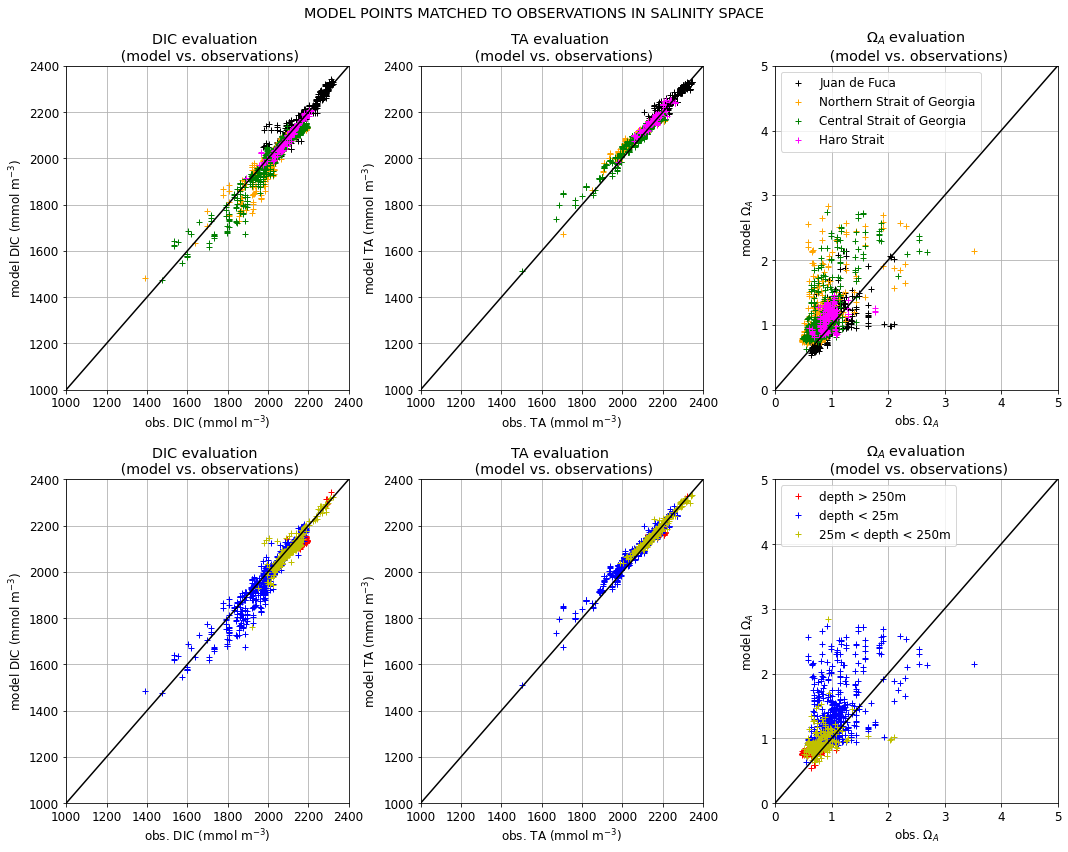

In [224]:
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}


yrs = np.arange(2013,2018,1)
fact = 0.6

evaled = ['dic','alk','OmegaA']
reglabs = ['Juan de Fuca','Northern Strait of Georgia','Central Strait of Georgia','Haro Strait',]
reg_cols = ['k', 'orange','green', 'fuchsia',  ]
fig, axs = plt.subplots(2,3, figsize=(25*fact, 20.1*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,3):
    for c in range(1,5):
        axs[i].plot(OBS[evaled[i]][OBS["loc_tag"] == c],MOD_2013[evaled[i]][OBS["loc_tag"] == c],\
                   color = reg_cols[c-1], marker = '+', label = reglabs[c-1],linestyle = '')
        
        axs[i].plot(OBS[evaled[i]][OBS["loc_tag"] == c],MOD_2014[evaled[i]][OBS["loc_tag"] == c],\
                   marker = '+', linestyle = '', color = reg_cols[c-1])
        axs[i].plot(OBS[evaled[i]][OBS["loc_tag"] == c],MOD_2015[evaled[i]][OBS["loc_tag"] == c],\
                   marker = '+', linestyle = '', color = reg_cols[c-1])
        axs[i].plot(OBS[evaled[i]][OBS["loc_tag"] == c],MOD_2016[evaled[i]][OBS["loc_tag"] == c],\
                   marker = '+', linestyle = '', color = reg_cols[c-1])
        axs[i].plot(OBS[evaled[i]][OBS["loc_tag"] == c],MOD_2017[evaled[i]][OBS["loc_tag"] == c],\
                   marker = '+', linestyle = '', color = reg_cols[c-1])

    axs[2].legend(ncol =1,loc = 'best')
    
for i in range(0,3):
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] > 250],MOD_2013[evaled[i]][OBS["P"] > 250],\
               marker = '+', linestyle = '', color = 'r', label = 'depth > 250m')#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] > 250],MOD_2014[evaled[i]][OBS["P"] > 250],\
           marker = '+', linestyle = '', color = 'r' )#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] > 250],MOD_2015[evaled[i]][OBS["P"] > 250],\
       marker = '+', linestyle = '', color = 'r' )#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] > 250],MOD_2016[evaled[i]][OBS["P"] > 250],\
   marker = '+', linestyle = '', color = 'r' )#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] > 250],MOD_2017[evaled[i]][OBS["P"] > 250],\
        marker = '+', linestyle = '', color = 'r' )#label = reglabs[c-1])
    
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] < 25],MOD_2013[evaled[i]][OBS["P"] < 25],\
               marker = '+', linestyle = '', color = 'b', label = 'depth < 25m ' )#label = reglabs[c-1])
    
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] < 25],MOD_2014[evaled[i]][OBS["P"] < 25],\
           marker = '+', linestyle = '', color = 'b' )#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] < 25],MOD_2015[evaled[i]][OBS["P"] < 25],\
       marker = '+', linestyle = '', color = 'b' )#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] < 25],MOD_2016[evaled[i]][OBS["P"] < 25],\
       marker = '+', linestyle = '', color = 'b' )#label = reglabs[c-1])
    axs[i+3].plot(OBS[evaled[i]][OBS["P"] < 25],MOD_2017[evaled[i]][OBS["P"] < 25],\
       marker = '+', linestyle = '', color = 'b' )#label = reglabs[c-1])
    
    tm  = (OBS["P"] > 25) & (OBS["P"] < 250) 
    axs[i+3].plot(OBS[evaled[i]][tm],MOD_2013[evaled[i]][tm],\
               marker = '+', linestyle = '', color = 'y', label = '25m < depth < 250m')#label = reglabs[c-1])
    axs[5].legend(ncol =1,loc = 'best')
    
tits = ['DIC evaluation \n (model vs. observations)', 'TA evaluation \n (model vs. observations)',\
       '$\Omega_A$ evaluation \n (model vs. observations)','DIC evaluation \n (model vs. observations)',
       'TA evaluation \n (model vs. observations)','$\Omega_A$ evaluation \n (model vs. observations)']
xlab = ['obs. DIC (mmol m$^{-3}$)', 'obs. TA (mmol m$^{-3}$)', 'obs. $\Omega_A$',
        'obs. DIC (mmol m$^{-3}$)', 'obs. TA (mmol m$^{-3}$)', 'obs. $\Omega_A$',]
ylab = ['model DIC (mmol m$^{-3}$)', 'model TA (mmol m$^{-3}$)', 'model $\Omega_A$',
        'model DIC (mmol m$^{-3}$)', 'model TA (mmol m$^{-3}$)', 'model $\Omega_A$',]

for i in range(0,6):
    axs[i].grid()
    axs[i].set_xlim([1000,2400])
    axs[i].set_ylim([1000,2400])
    axs[i].plot([1000,2400],[1000,2400],'k-')
    axs[i].set_title(tits[i])
    axs[i].set_xlabel(xlab[i])
    axs[i].set_ylabel(ylab[i])
    
axs[2].set_xlim([0,5])
axs[2].set_ylim([0,5])
axs[2].plot([0,5],[0,5],'k-')

axs[5].set_xlim([0,5])
axs[5].set_ylim([0,5])
axs[5].plot([0,5],[0,5],'k-')

fig.suptitle('MODEL POINTS MATCHED TO OBSERVATIONS IN SALINITY SPACE')
plt.tight_layout()

# [B] noticing domain proportion 

In [225]:
mod_mat = MOD_2013['dic'][~np.isnan(MOD_2013['dic'])]
print(mod_mat)

0      2116.872803
1      2107.750732
2      2093.163086
3      2084.171631
4      2074.861328
          ...     
567    2087.531006
568    2092.455078
569    2107.789795
570    2116.472900
571    2123.473145
Name: dic, Length: 459, dtype: float64


In [226]:
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# print(w['gdept_1d'][0][0:21])
# print(w['gdept_1d'][0][21:30])
# print(w['gdept_1d'][0][32:40])

import pickle
csize = pickle.load(open('../pkls/cellsize_alg2.pkl', 'rb'))


print(f'proportion of domain shallower than 25m: {np.nansum(csize[0:21,:,:])/np.nansum(csize[:,:,:])}')
print(f'proportion of domain 25m-250m: {np.nansum(csize[21:32,:,:])/np.nansum(csize[:,:,:])}')
print(f'proportion of domain deeper than 250m: {np.nansum(csize[32:40,:,:])/np.nansum(csize[:,:,:])}')
print()
print('2013')
mod_mat = MOD_2013[~np.isnan(MOD_2013['dic'])]
obs_mat = OBS[~np.isnan(MOD_2013['dic'])]
totobs = (np.size(mod_mat['dic']))
totobs_25 = np.size(mod_mat['dic'][obs_mat['P']<25])
totobs_mid = np.size(mod_mat['dic'][(obs_mat['P']>=25) & (obs_mat['P']<250)])
totobs_deep = np.size(mod_mat['dic'][ obs_mat['P']>=250])
print(f'total amount of observations (sal space): {totobs}')
print(f'proportion of obs shallower than 25m: {totobs_25/totobs}')
print(f'proportion of obs 25m-250m: {totobs_mid/totobs}')
print(f'proportion of obs deeper than 250m: {totobs_deep/totobs}')
print()
print('2014')
mod_mat = MOD_2014[~np.isnan(MOD_2014['dic'])]
obs_mat = OBS[~np.isnan(MOD_2014['dic'])]
totobs = (np.size(mod_mat['dic']))
totobs_25 = np.size(mod_mat['dic'][obs_mat['P']<25])
totobs_mid = np.size(mod_mat['dic'][(obs_mat['P']>=25) & (obs_mat['P']<250)])
totobs_deep = np.size(mod_mat['dic'][ obs_mat['P']>=250])
print(f'total amount of observations (sal space): {totobs}')
print(f'proportion of obs shallower than 25m: {totobs_25/totobs}')
print(f'proportion of obs 25m-250m: {totobs_mid/totobs}')
print(f'proportion of obs deeper than 250m: {totobs_deep/totobs}')
print()

print('2015')
mod_mat = MOD_2015[~np.isnan(MOD_2015['dic'])]
obs_mat = OBS[~np.isnan(MOD_2015['dic'])]
totobs = (np.size(mod_mat['dic']))
totobs_25 = np.size(mod_mat['dic'][obs_mat['P']<25])
totobs_mid = np.size(mod_mat['dic'][(obs_mat['P']>=25) & (obs_mat['P']<250)])
totobs_deep = np.size(mod_mat['dic'][ obs_mat['P']>=250])
print(f'total amount of observations (sal space): {totobs}')
print(f'proportion of obs shallower than 25m: {totobs_25/totobs}')
print(f'proportion of obs 25m-250m: {totobs_mid/totobs}')
print(f'proportion of obs deeper than 250m: {totobs_deep/totobs}')
print()

print('2016')
mod_mat = MOD_2016[~np.isnan(MOD_2016['dic'])]
obs_mat = OBS[~np.isnan(MOD_2016['dic'])]
totobs = (np.size(mod_mat['dic']))
totobs_25 = np.size(mod_mat['dic'][obs_mat['P']<25])
totobs_mid = np.size(mod_mat['dic'][(obs_mat['P']>=25) & (obs_mat['P']<250)])
totobs_deep = np.size(mod_mat['dic'][ obs_mat['P']>=250])
print(f'total amount of observations (sal space): {totobs}')
print(f'proportion of obs shallower than 25m: {totobs_25/totobs}')
print(f'proportion of obs 25m-250m: {totobs_mid/totobs}')
print(f'proportion of obs deeper than 250m: {totobs_deep/totobs}')
print()

print('2017')
mod_mat = MOD_2017[~np.isnan(MOD_2017['dic'])]
obs_mat = OBS[~np.isnan(MOD_2017['dic'])]
totobs = (np.size(mod_mat['dic']))
totobs_25 = np.size(mod_mat['dic'][obs_mat['P']<25])
totobs_mid = np.size(mod_mat['dic'][(obs_mat['P']>=25) & (obs_mat['P']<250)])
totobs_deep = np.size(mod_mat['dic'][ obs_mat['P']>=250])
print(f'total amount of observations (sal space): {totobs}')
print(f'proportion of obs shallower than 25m: {totobs_25/totobs}')
print(f'proportion of obs 25m-250m: {totobs_mid/totobs}')
print(f'proportion of obs deeper than 250m: {totobs_deep/totobs}')
print()

proportion of domain shallower than 25m: 0.1821448334853971
proportion of domain 25m-250m: 0.7115578061828943
proportion of domain deeper than 250m: 0.106297360331708

2013
total amount of observations (sal space): 459
proportion of obs shallower than 25m: 0.2788671023965142
proportion of obs 25m-250m: 0.6143790849673203
proportion of obs deeper than 250m: 0.10675381263616558

2014
total amount of observations (sal space): 436
proportion of obs shallower than 25m: 0.29128440366972475
proportion of obs 25m-250m: 0.5963302752293578
proportion of obs deeper than 250m: 0.11238532110091744

2015
total amount of observations (sal space): 446
proportion of obs shallower than 25m: 0.289237668161435
proportion of obs 25m-250m: 0.600896860986547
proportion of obs deeper than 250m: 0.10986547085201794

2016
total amount of observations (sal space): 466
proportion of obs shallower than 25m: 0.2918454935622318
proportion of obs 25m-250m: 0.6008583690987125
proportion of obs deeper than 250m: 0.1072

## calculate metrics by depth of observation

In [227]:
def bias_box(obs,mod):
    bias = (-np.mean(obs) + np.mean(mod))
    return bias

def RMSE_box(obs,mod):
    RMSE = (np.sqrt(np.sum((mod - obs)**2) /len(obs)))
    return RMSE

def WSS_box(obs,mod):
    xbar = np.mean(obs)
    WSS = (1-(np.sum((mod - obs)**2)  / np.sum((np.abs(mod - xbar) + np.abs(obs - xbar))**2)))
    return WSS

mask_shal = OBS['P']<25
mask_mid = (OBS['P']>=25) & (OBS['P']<250)
mask_deep = (OBS['P']>=250)

tms = [mask_shal, mask_mid, mask_deep,OBS['P']<1000]
types = ['dic','alk','OmegaA']

#metric, #thing being evaluated #mask
factbox_2013 = np.zeros([3,3,4])

#evaluated criterion
for e in range(0,3):
    for m in range(0,4):
        factbox_2013[0,e,m] = bias_box(OBS[types[e]][tms[m]], MOD_2013[types[e]][tms[m]])
        factbox_2013[1,e,m] = RMSE_box(OBS[types[e]][tms[m]], MOD_2013[types[e]][tms[m]])
        factbox_2013[2,e,m] = WSS_box(OBS[types[e]][tms[m]], MOD_2013[types[e]][tms[m]])

factbox_2014 = np.zeros([3,3,4])
#evaluated criterion
for e in range(0,3):
    for m in range(0,4):
        factbox_2014[0,e,m] = bias_box(OBS[types[e]][tms[m]], MOD_2014[types[e]][tms[m]])
        factbox_2014[1,e,m] = RMSE_box(OBS[types[e]][tms[m]], MOD_2014[types[e]][tms[m]])
        factbox_2014[2,e,m] = WSS_box(OBS[types[e]][tms[m]], MOD_2014[types[e]][tms[m]])
#evaluated criterion
factbox_2015 = np.zeros([3,3,4])
for e in range(0,3):
    for m in range(0,4):
        factbox_2015[0,e,m] = bias_box(OBS[types[e]][tms[m]], MOD_2015[types[e]][tms[m]])
        factbox_2015[1,e,m] = RMSE_box(OBS[types[e]][tms[m]], MOD_2015[types[e]][tms[m]])
        factbox_2015[2,e,m] = WSS_box(OBS[types[e]][tms[m]], MOD_2015[types[e]][tms[m]])

factbox_2016 = np.zeros([3,3,4])
#evaluated criterion
for e in range(0,3):
    for m in range(0,4):
        factbox_2016[0,e,m] = bias_box(OBS[types[e]][tms[m]], MOD_2016[types[e]][tms[m]])
        factbox_2016[1,e,m] = RMSE_box(OBS[types[e]][tms[m]], MOD_2016[types[e]][tms[m]])
        factbox_2016[2,e,m] = WSS_box(OBS[types[e]][tms[m]], MOD_2016[types[e]][tms[m]])

factbox_2017 = np.zeros([3,3,4])
#evaluated criterion
for e in range(0,3):
    for m in range(0,4):
        factbox_2017[0,e,m] = bias_box(OBS[types[e]][tms[m]], MOD_2017[types[e]][tms[m]])
        factbox_2017[1,e,m] = RMSE_box(OBS[types[e]][tms[m]], MOD_2017[types[e]][tms[m]])
        factbox_2017[2,e,m] = WSS_box(OBS[types[e]][tms[m]], MOD_2017[types[e]][tms[m]])
    
# print('bias with depth')
# print(factbox_2013[0,2,:])
# print(factbox_2014[0,2,:])
# print(factbox_2015[0,2,:])
# print(factbox_2016[0,2,:])
# print(factbox_2017[0,2,:])

big_factbox = np.zeros([5,3,3,4])
big_factbox[0,:,:,:] = factbox_2013
big_factbox[1,:,:,:] = factbox_2014
big_factbox[2,:,:,:] = factbox_2015
big_factbox[3,:,:,:] = factbox_2016
big_factbox[4,:,:,:] = factbox_2017

## [C] evaluation metrics - ranges

In [228]:
dic_bias_d = np.zeros(5)
dic_RMSE_d = np.zeros(5)
dic_WSS_d = np.zeros(5)
dic_stdrat_d = np.zeros(5)

# yr = 2013; 
# fname = f'./extracted_calculated/STATS_{yr}_COMB_depthspace.csv'
# STATS_2013 = pd.read_csv(fname)
# print(STATS_2013)

for i in range(2013,2018):
    fname = f'./extracted_calculated/STATS_{i}_COMB_depthspace.csv'
    df = pd.read_csv(fname)
    dic_bias_d[i-2013] = df['dic_bias'][0]
    dic_RMSE_d[i-2013] = df['dic_RMSE'][0]
    dic_WSS_d[i-2013] = df['dic_WSS'][0]
    dic_stdrat_d[i-2013] = df['dic_stdrat_MtoO'][0]
    
alk_bias_d = np.zeros(5)
alk_RMSE_d = np.zeros(5)
alk_WSS_d = np.zeros(5)
alk_stdrat_d = np.zeros(5)

for i in range(2013,2018):
    fname = f'./extracted_calculated/STATS_{i}_COMB_depthspace.csv'
    df = pd.read_csv(fname)
    alk_bias_d[i-2013] = df['alk_bias'][0]
    alk_RMSE_d[i-2013] = df['alk_RMSE'][0]
    alk_WSS_d[i-2013] = df['alk_WSS'][0]
    alk_stdrat_d[i-2013] = df['alk_stdrat_MtoO'][0]
    
OmegaA_bias_d = np.zeros(5)
OmegaA_RMSE_d = np.zeros(5)
OmegaA_WSS_d = np.zeros(5)
OmegaA_stdrat_d = np.zeros(5)

for i in range(2013,2018):
    fname = f'./extracted_calculated/STATS_{i}_COMB_depthspace.csv'
    df = pd.read_csv(fname)
    OmegaA_bias_d[i-2013] = df['OmegaA_bias'][0]
    OmegaA_RMSE_d[i-2013] = df['OmegaA_RMSE'][0]
    OmegaA_WSS_d[i-2013] = df['OmegaA_WSS'][0]
    OmegaA_stdrat_d[i-2013] = df['OmegaA_stdrat_MtoO'][0]
    



In [229]:
dic_bias_s = np.zeros(5)
dic_RMSE_s = np.zeros(5)
dic_WSS_s = np.zeros(5)
dic_stdrat_s = np.zeros(5)

# yr = 2013; 
# fname = f'./extracted_calculated/STATS_{yr}_COMB_salspace.csv'
# STATS_2013 = pd.read_csv(fname)
# print(STATS_2013)

for i in range(2013,2018):
    fname = f'./extracted_calculated/STATS_{i}_COMB_salspace.csv'
    df = pd.read_csv(fname)
    dic_bias_s[i-2013] = df['dic_bias'][0]
    dic_RMSE_s[i-2013] = df['dic_RMSE'][0]
    dic_WSS_s[i-2013] = df['dic_WSS'][0]
    dic_stdrat_s[i-2013] = df['dic_stdrat_MtoO'][0]
    
alk_bias_s = np.zeros(5)
alk_RMSE_s = np.zeros(5)
alk_WSS_s = np.zeros(5)
alk_stdrat_s = np.zeros(5)

for i in range(2013,2018):
    fname = f'./extracted_calculated/STATS_{i}_COMB_salspace.csv'
    df = pd.read_csv(fname)
    alk_bias_s[i-2013] = df['alk_bias'][0]
    alk_RMSE_s[i-2013] = df['alk_RMSE'][0]
    alk_WSS_s[i-2013] = df['alk_WSS'][0]
    alk_stdrat_s[i-2013] = df['alk_stdrat_MtoO'][0]
    
OmegaA_bias_s = np.zeros(5)
OmegaA_RMSE_s = np.zeros(5)
OmegaA_WSS_s = np.zeros(5)
OmegaA_stdrat_s = np.zeros(5)

for i in range(2013,2018):
    fname = f'./extracted_calculated/STATS_{i}_COMB_salspace.csv'
    df = pd.read_csv(fname)
    OmegaA_bias_s[i-2013] = df['OmegaA_bias'][0]
    OmegaA_RMSE_s[i-2013] = df['OmegaA_RMSE'][0]
    OmegaA_WSS_s[i-2013] = df['OmegaA_WSS'][0]
    OmegaA_stdrat_s[i-2013] = df['OmegaA_stdrat_MtoO'][0]
    

In [230]:
print('dic metrics, ranges')
print(f'dic bias max, min (by depth): {np.max(dic_bias_d)}, {np.min(dic_bias_d)}')
print(f'dic bias max, min (by sal): {np.max(dic_bias_s)}, {np.min(dic_bias_s)}')
print('')
print(f'dic RMSE max, min (by depth): {np.max(dic_RMSE_d)}, {np.min(dic_RMSE_d)}')
print(f'dic RMSE max, min (by sal): {np.max(dic_RMSE_s)}, {np.min(dic_RMSE_s)}')
print('')
print(f'dic WSS max, min (by depth): {np.max(dic_WSS_d)}, {np.min(dic_WSS_d)}')
print(f'dic WSS max, min (by sal): {np.max(dic_WSS_s)}, {np.min(dic_WSS_s)}')
print('')
print(f'dic rat. model std.dev to obs std.dev max, min (by depth): {np.max(dic_stdrat_d)}, {np.min(dic_stdrat_d)}')
print(f'dic rat. model std.dev to obs std.dev max, min (by sal): {np.max(dic_stdrat_s)}, {np.min(dic_stdrat_s)}')

dic metrics, ranges
dic bias max, min (by depth): 7.589205870189744, -4.354990558381815
dic bias max, min (by sal): -10.966694902561812, -19.129842265400384

dic RMSE max, min (by depth): 87.43718120307072, 65.9649510214151
dic RMSE max, min (by sal): 36.59378524658053, 29.270989226280022

dic WSS max, min (by depth): 0.9473595007650116, 0.9073510804434098
dic WSS max, min (by sal): 0.980519506232322, 0.9700680456678143

dic rat. model std.dev to obs std.dev max, min (by depth): 0.8864751165616744, 0.8018030765854774
dic rat. model std.dev to obs std.dev max, min (by sal): 1.0731829037423108, 1.0104602871111583


In [231]:
print('alk metrics, ranges')
print(f'alk bias max, min (by depth): {np.max(alk_bias_d)}, {np.min(alk_bias_d)}')
print(f'alk bias max, min (by sal): {np.max(alk_bias_s)}, {np.min(alk_bias_s)}')
print('')
print(f'alk RMSE max, min (by depth): {np.max(alk_RMSE_d)}, {np.min(alk_RMSE_d)}')
print(f'alk RMSE max, min (by sal): {np.max(alk_RMSE_s)}, {np.min(alk_RMSE_s)}')
print('')
print(f'alk WSS max, min (by depth): {np.max(alk_WSS_d)}, {np.min(alk_WSS_d)}')
print(f'alk WSS max, min (by sal): {np.max(alk_WSS_s)}, {np.min(alk_WSS_s)}')
print('')
print(f'alk rat. model std.dev to obs std.dev max, min (by depth): {np.max(alk_stdrat_d)}, {np.min(alk_stdrat_d)}')
print(f'alk rat. model std.dev to obs std.dev max, min (by sal): {np.max(alk_stdrat_s)}, {np.min(alk_stdrat_s)}')

alk metrics, ranges
alk bias max, min (by depth): 29.371329597621298, 26.355879414365067
alk bias max, min (by sal): 14.300984109703677, 10.137626619643925

alk RMSE max, min (by depth): 86.5336145523798, 69.26650400771649
alk RMSE max, min (by sal): 23.73957301311949, 20.796638729269

alk WSS max, min (by depth): 0.9215848281508208, 0.8634699165339672
alk WSS max, min (by sal): 0.9842314215667972, 0.9804691394680636

alk rat. model std.dev to obs std.dev max, min (by depth): 0.7798507761188725, 0.677865740767684
alk rat. model std.dev to obs std.dev max, min (by sal): 0.9238768046765468, 0.8891806071726471


In [232]:
print('OmegaA metrics, ranges')
print(f'OmegaA bias max, min (by depth): {np.max(OmegaA_bias_d)}, {np.min(OmegaA_bias_d)}')
print(f'OmegaA bias max, min (by sal): {np.max(OmegaA_bias_s)}, {np.min(OmegaA_bias_s)}')
print('')
print(f'OmegaA RMSE max, min (by depth): {np.max(OmegaA_RMSE_d)}, {np.min(OmegaA_RMSE_d)}')
print(f'OmegaA RMSE max, min (by sal): {np.max(OmegaA_RMSE_s)}, {np.min(OmegaA_RMSE_s)}')
print('')
print(f'OmegaA WSS max, min (by depth): {np.max(OmegaA_WSS_d)}, {np.min(OmegaA_WSS_d)}')
print(f'OmegaA WSS max, min (by sal): {np.max(OmegaA_WSS_s)}, {np.min(OmegaA_WSS_s)}')
print('')
print(f'OmegaA rat. model std.dev to obs std.dev max, min (by depth): {np.max(OmegaA_stdrat_d)}, {np.min(OmegaA_stdrat_d)}')
print(f'OmegaA rat. model std.dev to obs std.dev max, min (by sal): {np.max(OmegaA_stdrat_s)}, {np.min(OmegaA_stdrat_s)}')

OmegaA metrics, ranges
OmegaA bias max, min (by depth): 0.23509242229954685, 0.13839657730183774
OmegaA bias max, min (by sal): 0.23018128787645756, 0.17493008309622615

OmegaA RMSE max, min (by depth): 0.4264367407189608, 0.3264080393479465
OmegaA RMSE max, min (by sal): 0.361807878405924, 0.3079588521680669

OmegaA WSS max, min (by depth): 0.8230305168635492, 0.6960110059641572
OmegaA WSS max, min (by sal): 0.7171733946061079, 0.6426603411983425

OmegaA rat. model std.dev to obs std.dev max, min (by depth): 1.1774377795513096, 0.9052811342729716
OmegaA rat. model std.dev to obs std.dev max, min (by sal): 1.405204713071718, 1.2363409430526122


# [D] - skill metrics by depth

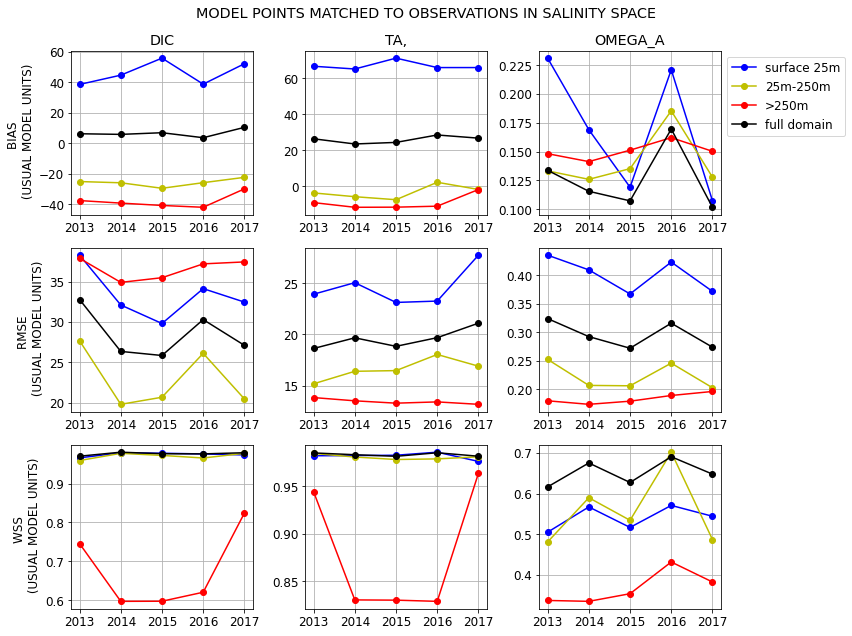

In [233]:
fig, axs = plt.subplots(3,3, figsize=(20*fact, 15*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
tits = ['DIC','TA,','OMEGA_A']
#metric, #thing being evaluated #mask

count = 0
for i in range(0,3):
    axs[i].plot(np.arange(2013,2018,1),big_factbox[:,0,i,0],'bo-', label = 'surface 25m')
    axs[i].plot(np.arange(2013,2018,1),big_factbox[:,0,i,1],'yo-', label = '25m-250m')
    axs[i].plot(np.arange(2013,2018,1),big_factbox[:,0,i,2],'ro-', label = '>250m')
    axs[i].plot(np.arange(2013,2018,1),big_factbox[:,0,i,3],'ko-', label = 'full domain')
    axs[i].set_title(tits[i])
    axs[0].set_ylabel('BIAS \n (USUAL MODEL UNITS)')
for i in range(0,3):
    axs[i+3].plot(np.arange(2013,2018,1),big_factbox[:,1,i,0],'bo-')
    axs[i+3].plot(np.arange(2013,2018,1),big_factbox[:,1,i,1],'yo-')
    axs[i+3].plot(np.arange(2013,2018,1),big_factbox[:,1,i,2],'ro-')
    axs[i+3].plot(np.arange(2013,2018,1),big_factbox[:,1,i,3],'ko-')
    axs[3].set_ylabel('RMSE \n (USUAL MODEL UNITS)')
for i in range(0,3):
    axs[i+6].plot(np.arange(2013,2018,1),big_factbox[:,2,i,0],'bo-')
    axs[i+6].plot(np.arange(2013,2018,1),big_factbox[:,2,i,1],'yo-')
    axs[i+6].plot(np.arange(2013,2018,1),big_factbox[:,2,i,2],'ro-')
    axs[i+6].plot(np.arange(2013,2018,1),big_factbox[:,2,i,3],'ko-')
    axs[6].set_ylabel('WSS \n (USUAL MODEL UNITS)')
    
for i in range(0,9):
    axs[i].grid()
    axs[i].set_xticks(np.arange(2013,2018,1))
    
axs[2].legend(bbox_to_anchor = [1,1])
fig.suptitle('MODEL POINTS MATCHED TO OBSERVATIONS IN SALINITY SPACE')
plt.tight_layout()

# DEBBY EVALUATION

## mid depths - 25-250 meters:

reporting classic metrics in salinity space


proportion of domain 25m-250m: 0.7115578061828943


proportion of domain deeper than 250m: 0.106297360331708

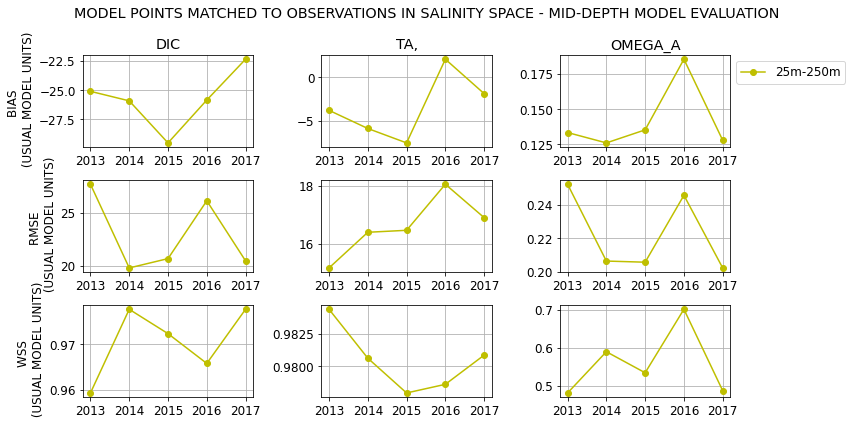

In [234]:
fig, axs = plt.subplots(3,3, figsize=(20*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
tits = ['DIC','TA,','OMEGA_A']
#metric, #thing being evaluated #mask

count = 0
for i in range(0,3):
    axs[i].plot(np.arange(2013,2018,1),big_factbox[:,0,i,1],'yo-', label = '25m-250m')
    axs[i].set_title(tits[i])
    axs[0].set_ylabel('BIAS \n (USUAL MODEL UNITS)')
for i in range(0,3):
    axs[i+3].plot(np.arange(2013,2018,1),big_factbox[:,1,i,1],'yo-')
    axs[3].set_ylabel('RMSE \n (USUAL MODEL UNITS)')
for i in range(0,3):
    axs[i+6].plot(np.arange(2013,2018,1),big_factbox[:,2,i,1],'yo-')
    axs[6].set_ylabel('WSS \n (USUAL MODEL UNITS)')
    
for i in range(0,9):
    axs[i].grid()
    axs[i].set_xticks(np.arange(2013,2018,1))
    
axs[2].legend(bbox_to_anchor = [1,1])
fig.suptitle('MODEL POINTS MATCHED TO OBSERVATIONS IN SALINITY SPACE - MID-DEPTH MODEL EVALUATION')
plt.tight_layout()

## histograms of obs in top 25 meters and deeper than 250 meters
## NOT SALINITY NORMALIZED:

Above 25 m look at probability distributions of *salinity normalized DIC and TA* and/or Omega.     Reasoning - short time scale biological fluxes are key controls of variability in this zone during much of the year (remin t-scales deeper are longer so day matching isn’t as critical) so matching in time and x-y space (e.g. plume location) may be difficult.   I hope that we are able to see that the model distribution includes the data nicely.  We may also see that the DIC bias in the dynamic surface area is surprisingly low. 
Also calc volume of model domain.

proportion of domain shallower than 25m: 0.1821448334853971
proportion of domain deeper than 250m: 0.106297360331708

In [235]:
dset = 'COMB'
yr = 2013; 
fname = f'./extracted_calculated/YR{yr}_{dset}_depthspace_modeloutput_with_Omega.csv'
MOD_ds_2013 = pd.read_csv(fname)
yr = 2014; 
fname = f'./extracted_calculated/YR{yr}_{dset}_depthspace_modeloutput_with_Omega.csv'
MOD_ds_2014 = pd.read_csv(fname)
yr = 2015; 
fname = f'./extracted_calculated/YR{yr}_{dset}_depthspace_modeloutput_with_Omega.csv'
MOD_ds_2015 = pd.read_csv(fname)
yr = 2016; 
fname = f'./extracted_calculated/YR{yr}_{dset}_depthspace_modeloutput_with_Omega.csv'
MOD_ds_2016 = pd.read_csv(fname)
yr = 2017; 
fname = f'./extracted_calculated/YR{yr}_{dset}_depthspace_modeloutput_with_Omega.csv'
MOD_ds_2017 = pd.read_csv(fname)

MOD_ds_2013['OmegaA'][MOD_ds_2013['OmegaA']>1e10] = np.nan
MOD_ds_2014['OmegaA'][MOD_ds_2014['OmegaA']>1e10] = np.nan
MOD_ds_2015['OmegaA'][MOD_ds_2015['OmegaA']>1e10] = np.nan
MOD_ds_2016['OmegaA'][MOD_ds_2016['OmegaA']>1e10] = np.nan
MOD_ds_2017['OmegaA'][MOD_ds_2017['OmegaA']>1e10] = np.nan

fname = f'./extracted_calculated/OBS_COMB_MASKED_umolL.csv'
OBS = pd.read_csv(fname)

In [236]:
step = 50
t_start = 1500
t_end = 2500
bin_starts = np.arange(t_start,t_end,step)
bin_ends = np.arange(t_start+step,t_end+step,step)
bin_centres = np.arange(t_start+step/2,t_end + step/2 ,step)
bin_prop = np.zeros_like(bin_centres)

def manual_hist(test_hist):
    for i in range(0,len(bin_starts)):
        obs_in_bin = test_hist[((test_hist>=bin_starts[i]) &\
                               (test_hist<bin_ends[i]))]

        bin_prop[i] = np.size(obs_in_bin)/np.size(test_hist)
    return bin_prop


In [237]:
step = 25
t_start = 1500
t_end = 2500
bin_starts = np.arange(t_start,t_end,step)
bin_ends = np.arange(t_start+step,t_end+step,step)
bin_centres = np.arange(t_start+step/2,t_end + step/2 ,step)
bin_prop = np.zeros_like(bin_centres)

### hist calculations
MASK = OBS['P']>=0
bin_prop_OBS_dic = manual_hist(OBS['dic'][MASK])
bp_OBS_dic = np.copy(bin_prop_OBS_dic)
bin_prop_MOD_2013_dic = manual_hist(MOD_ds_2013['dic'][MASK])
bp_MOD_2013_dic = np.copy(bin_prop_MOD_2013_dic)
bin_prop_MOD_2014_dic = manual_hist(MOD_ds_2014['dic'][MASK])
bp_MOD_2014_dic = np.copy(bin_prop_MOD_2014_dic)
bin_prop_MOD_2015_dic = manual_hist(MOD_ds_2015['dic'][MASK])
bp_MOD_2015_dic = np.copy(bin_prop_MOD_2015_dic)
bin_prop_MOD_2017_dic = manual_hist(MOD_ds_2017['dic'][MASK])
bp_MOD_2017_dic = np.copy(bin_prop_MOD_2017_dic)
bin_prop_MOD_2016_dic = manual_hist(MOD_ds_2016['dic'][MASK])
bp_MOD_2016_dic = np.copy(bin_prop_MOD_2016_dic)

bin_prop_OBS_alk = manual_hist(OBS['alk'][MASK])
bp_OBS_alk = np.copy(bin_prop_OBS_alk)
bin_prop_MOD_2013_alk = manual_hist(MOD_ds_2013['alk'][MASK])
bp_MOD_2013_alk = np.copy(bin_prop_MOD_2013_alk)
bin_prop_MOD_2014_alk = manual_hist(MOD_ds_2014['alk'][MASK])
bp_MOD_2014_alk = np.copy(bin_prop_MOD_2014_alk)
bin_prop_MOD_2015_alk = manual_hist(MOD_ds_2015['alk'][MASK])
bp_MOD_2015_alk = np.copy(bin_prop_MOD_2015_alk)
bin_prop_MOD_2017_alk = manual_hist(MOD_ds_2017['alk'][MASK])
bp_MOD_2017_alk = np.copy(bin_prop_MOD_2017_alk)
bin_prop_MOD_2016_alk = manual_hist(MOD_ds_2016['alk'][MASK])
bp_MOD_2016_alk = np.copy(bin_prop_MOD_2016_alk)

step = 0.1
t_start = 0
t_end = 3
bin_starts = np.arange(t_start,t_end,step)
bin_ends = np.arange(t_start+step,t_end+step,step)
bin_centres_Omega = np.arange(t_start+step/2,t_end + step/2 ,step)
bin_prop = np.zeros_like(bin_centres_Omega)

bin_prop_OBS_OmegaA = manual_hist(OBS['OmegaA'][MASK])
bp_OBS_OmegaA = np.copy(bin_prop_OBS_OmegaA)
bin_prop_MOD_2013_OmegaA = manual_hist(MOD_ds_2013['OmegaA'][MASK])
bp_MOD_2013_OmegaA = np.copy(bin_prop_MOD_2013_OmegaA)
bin_prop_MOD_2014_OmegaA = manual_hist(MOD_ds_2014['OmegaA'][MASK])
bp_MOD_2014_OmegaA = np.copy(bin_prop_MOD_2014_OmegaA)
bin_prop_MOD_2015_OmegaA = manual_hist(MOD_ds_2015['OmegaA'][MASK])
bp_MOD_2015_OmegaA = np.copy(bin_prop_MOD_2015_OmegaA)
bin_prop_MOD_2017_OmegaA = manual_hist(MOD_ds_2017['OmegaA'][MASK])
bp_MOD_2017_OmegaA = np.copy(bin_prop_MOD_2017_OmegaA)
bin_prop_MOD_2016_OmegaA = manual_hist(MOD_ds_2016['OmegaA'][MASK])
bp_MOD_2016_OmegaA = np.copy(bin_prop_MOD_2016_OmegaA)


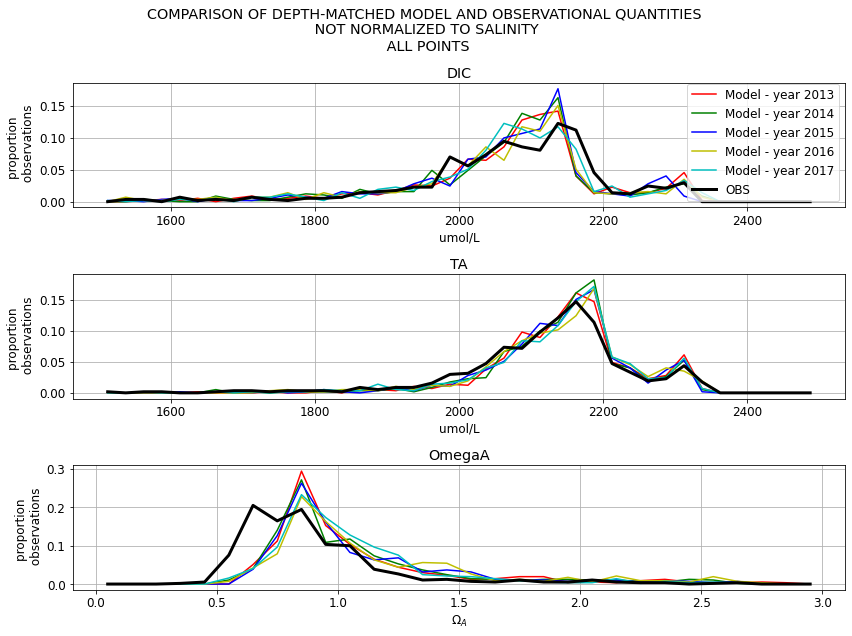

In [238]:
fig, axs = plt.subplots(3,1, figsize=(20*fact, 15*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


axs[0].plot(bin_centres,bp_MOD_2013_dic,'r-', label = 'Model - year 2013' )
axs[0].plot(bin_centres,bp_MOD_2014_dic,'g-', label = 'Model - year 2014' )
axs[0].plot(bin_centres,bp_MOD_2015_dic,'b-', label = 'Model - year 2015' )
axs[0].plot(bin_centres,bp_MOD_2016_dic,'y-', label = 'Model - year 2016' )
axs[0].plot(bin_centres,bp_MOD_2017_dic,'c-', label = 'Model - year 2017' )
axs[0].plot(bin_centres,bp_OBS_dic,'k-', linewidth = 3, label = 'OBS')

axs[1].plot(bin_centres,bp_MOD_2013_alk,'r-', label = 'Model - year 2013' )
axs[1].plot(bin_centres,bp_MOD_2014_alk,'g-', label = 'Model - year 2014' )
axs[1].plot(bin_centres,bp_MOD_2015_alk,'b-', label = 'Model - year 2015' )
axs[1].plot(bin_centres,bp_MOD_2016_alk,'y-', label = 'Model - year 2016' )
axs[1].plot(bin_centres,bp_MOD_2017_alk,'c-', label = 'Model - year 2017' )
axs[1].plot(bin_centres,bp_OBS_alk,'k-', linewidth = 3, label = 'OBS')

axs[2].plot(bin_centres_Omega,bp_MOD_2013_OmegaA,'r-', label = 'Model - year 2013' )
axs[2].plot(bin_centres_Omega,bp_MOD_2014_OmegaA,'g-', label = 'Model - year 2014' )
axs[2].plot(bin_centres_Omega,bp_MOD_2015_OmegaA,'b-', label = 'Model - year 2015' )
axs[2].plot(bin_centres_Omega,bp_MOD_2016_OmegaA,'y-', label = 'Model - year 2016' )
axs[2].plot(bin_centres_Omega,bp_MOD_2017_OmegaA,'c-', label = 'Model - year 2017' )
axs[2].plot(bin_centres_Omega,bp_OBS_OmegaA,'k-', linewidth = 3, label = 'OBS')

for i in range(0,3):
    axs[i].grid()
    axs[i].set_ylabel('proportion \n observations')
    axs[i].set_xlabel('umol/L')
    
axs[0].legend(loc='best')
axs[2].set_xlabel('$\Omega_A$')

axs[0].set_title('DIC')
axs[1].set_title('TA')
axs[2].set_title('OmegaA')

plt.suptitle('COMPARISON OF DEPTH-MATCHED MODEL AND OBSERVATIONAL QUANTITIES \n NOT NORMALIZED TO SALINITY \n ALL POINTS')
plt.tight_layout()

In [239]:
step = 25
t_start = 1500
t_end = 2500
bin_starts = np.arange(t_start,t_end,step)
bin_ends = np.arange(t_start+step,t_end+step,step)
bin_centres = np.arange(t_start+step/2,t_end + step/2 ,step)
bin_prop = np.zeros_like(bin_centres)

### hist calculations
MASK = OBS['P']<=25
bin_prop_OBS_dic = manual_hist(OBS['dic'][MASK])
bp_OBS_dic = np.copy(bin_prop_OBS_dic)
bin_prop_MOD_2013_dic = manual_hist(MOD_ds_2013['dic'][MASK])
bp_MOD_2013_dic = np.copy(bin_prop_MOD_2013_dic)
bin_prop_MOD_2014_dic = manual_hist(MOD_ds_2014['dic'][MASK])
bp_MOD_2014_dic = np.copy(bin_prop_MOD_2014_dic)
bin_prop_MOD_2015_dic = manual_hist(MOD_ds_2015['dic'][MASK])
bp_MOD_2015_dic = np.copy(bin_prop_MOD_2015_dic)
bin_prop_MOD_2017_dic = manual_hist(MOD_ds_2017['dic'][MASK])
bp_MOD_2017_dic = np.copy(bin_prop_MOD_2017_dic)
bin_prop_MOD_2016_dic = manual_hist(MOD_ds_2016['dic'][MASK])
bp_MOD_2016_dic = np.copy(bin_prop_MOD_2016_dic)

bin_prop_OBS_alk = manual_hist(OBS['alk'][MASK])
bp_OBS_alk = np.copy(bin_prop_OBS_alk)
bin_prop_MOD_2013_alk = manual_hist(MOD_ds_2013['alk'][MASK])
bp_MOD_2013_alk = np.copy(bin_prop_MOD_2013_alk)
bin_prop_MOD_2014_alk = manual_hist(MOD_ds_2014['alk'][MASK])
bp_MOD_2014_alk = np.copy(bin_prop_MOD_2014_alk)
bin_prop_MOD_2015_alk = manual_hist(MOD_ds_2015['alk'][MASK])
bp_MOD_2015_alk = np.copy(bin_prop_MOD_2015_alk)
bin_prop_MOD_2017_alk = manual_hist(MOD_ds_2017['alk'][MASK])
bp_MOD_2017_alk = np.copy(bin_prop_MOD_2017_alk)
bin_prop_MOD_2016_alk = manual_hist(MOD_ds_2016['alk'][MASK])
bp_MOD_2016_alk = np.copy(bin_prop_MOD_2016_alk)

step = 0.1
t_start = 0
t_end = 3
bin_starts = np.arange(t_start,t_end,step)
bin_ends = np.arange(t_start+step,t_end+step,step)
bin_centres_Omega = np.arange(t_start+step/2,t_end + step/2 ,step)
bin_prop = np.zeros_like(bin_centres_Omega)

bin_prop_OBS_OmegaA = manual_hist(OBS['OmegaA'][MASK])
bp_OBS_OmegaA = np.copy(bin_prop_OBS_OmegaA)
bin_prop_MOD_2013_OmegaA = manual_hist(MOD_ds_2013['OmegaA'][MASK])
bp_MOD_2013_OmegaA = np.copy(bin_prop_MOD_2013_OmegaA)
bin_prop_MOD_2014_OmegaA = manual_hist(MOD_ds_2014['OmegaA'][MASK])
bp_MOD_2014_OmegaA = np.copy(bin_prop_MOD_2014_OmegaA)
bin_prop_MOD_2015_OmegaA = manual_hist(MOD_ds_2015['OmegaA'][MASK])
bp_MOD_2015_OmegaA = np.copy(bin_prop_MOD_2015_OmegaA)
bin_prop_MOD_2017_OmegaA = manual_hist(MOD_ds_2017['OmegaA'][MASK])
bp_MOD_2017_OmegaA = np.copy(bin_prop_MOD_2017_OmegaA)
bin_prop_MOD_2016_OmegaA = manual_hist(MOD_ds_2016['OmegaA'][MASK])
bp_MOD_2016_OmegaA = np.copy(bin_prop_MOD_2016_OmegaA)


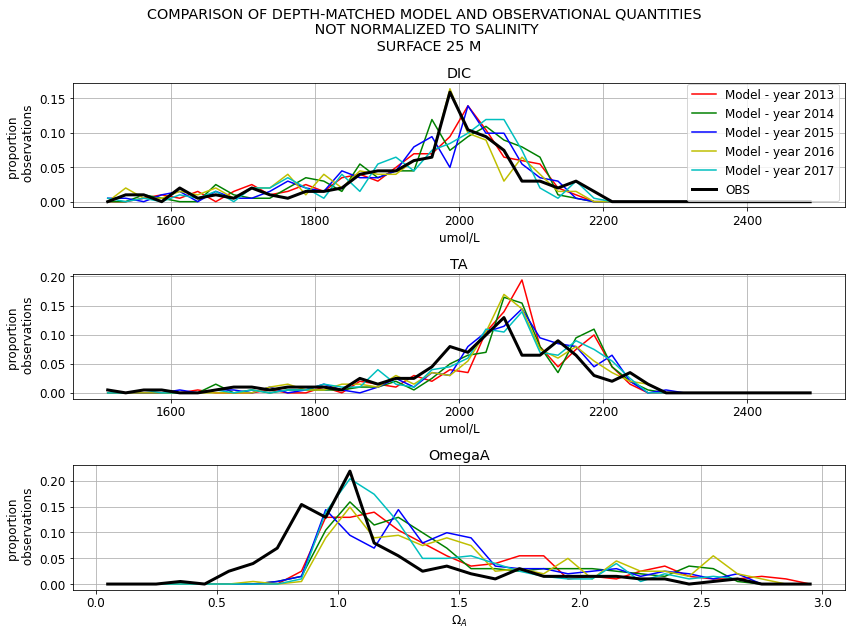

In [240]:
fig, axs = plt.subplots(3,1, figsize=(20*fact, 15*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


axs[0].plot(bin_centres,bp_MOD_2013_dic,'r-', label = 'Model - year 2013' )
axs[0].plot(bin_centres,bp_MOD_2014_dic,'g-', label = 'Model - year 2014' )
axs[0].plot(bin_centres,bp_MOD_2015_dic,'b-', label = 'Model - year 2015' )
axs[0].plot(bin_centres,bp_MOD_2016_dic,'y-', label = 'Model - year 2016' )
axs[0].plot(bin_centres,bp_MOD_2017_dic,'c-', label = 'Model - year 2017' )
axs[0].plot(bin_centres,bp_OBS_dic,'k-', linewidth = 3, label = 'OBS')

axs[1].plot(bin_centres,bp_MOD_2013_alk,'r-', label = 'Model - year 2013' )
axs[1].plot(bin_centres,bp_MOD_2014_alk,'g-', label = 'Model - year 2014' )
axs[1].plot(bin_centres,bp_MOD_2015_alk,'b-', label = 'Model - year 2015' )
axs[1].plot(bin_centres,bp_MOD_2016_alk,'y-', label = 'Model - year 2016' )
axs[1].plot(bin_centres,bp_MOD_2017_alk,'c-', label = 'Model - year 2017' )
axs[1].plot(bin_centres,bp_OBS_alk,'k-', linewidth = 3, label = 'OBS')

axs[2].plot(bin_centres_Omega,bp_MOD_2013_OmegaA,'r-', label = 'Model - year 2013' )
axs[2].plot(bin_centres_Omega,bp_MOD_2014_OmegaA,'g-', label = 'Model - year 2014' )
axs[2].plot(bin_centres_Omega,bp_MOD_2015_OmegaA,'b-', label = 'Model - year 2015' )
axs[2].plot(bin_centres_Omega,bp_MOD_2016_OmegaA,'y-', label = 'Model - year 2016' )
axs[2].plot(bin_centres_Omega,bp_MOD_2017_OmegaA,'c-', label = 'Model - year 2017' )
axs[2].plot(bin_centres_Omega,bp_OBS_OmegaA,'k-', linewidth = 3, label = 'OBS')

for i in range(0,3):
    axs[i].grid()
    axs[i].set_ylabel('proportion \n observations')
    axs[i].set_xlabel('umol/L')
    
axs[0].legend(loc='best')
axs[2].set_xlabel('$\Omega_A$')
axs[0].set_title('DIC')
axs[1].set_title('TA')
axs[2].set_title('OmegaA')

plt.suptitle('COMPARISON OF DEPTH-MATCHED MODEL AND OBSERVATIONAL QUANTITIES \n NOT NORMALIZED TO SALINITY \n SURFACE 25 M')
plt.tight_layout()

In [241]:
step = 25
t_start = 2000
t_end = 2500
bin_starts = np.arange(t_start,t_end,step)
bin_ends = np.arange(t_start+step,t_end+step,step)
bin_centres = np.arange(t_start+step/2,t_end + step/2 ,step)
bin_prop = np.zeros_like(bin_centres)

### hist calculations
MASK = OBS['P']>250
bin_prop_OBS_dic = manual_hist(OBS['dic'][MASK])
bp_OBS_dic = np.copy(bin_prop_OBS_dic)
bin_prop_MOD_2013_dic = manual_hist(MOD_ds_2013['dic'][MASK])
bp_MOD_2013_dic = np.copy(bin_prop_MOD_2013_dic)
bin_prop_MOD_2014_dic = manual_hist(MOD_ds_2014['dic'][MASK])
bp_MOD_2014_dic = np.copy(bin_prop_MOD_2014_dic)
bin_prop_MOD_2015_dic = manual_hist(MOD_ds_2015['dic'][MASK])
bp_MOD_2015_dic = np.copy(bin_prop_MOD_2015_dic)
bin_prop_MOD_2017_dic = manual_hist(MOD_ds_2017['dic'][MASK])
bp_MOD_2017_dic = np.copy(bin_prop_MOD_2017_dic)
bin_prop_MOD_2016_dic = manual_hist(MOD_ds_2016['dic'][MASK])
bp_MOD_2016_dic = np.copy(bin_prop_MOD_2016_dic)

bin_prop_OBS_alk = manual_hist(OBS['alk'][MASK])
bp_OBS_alk = np.copy(bin_prop_OBS_alk)
bin_prop_MOD_2013_alk = manual_hist(MOD_ds_2013['alk'][MASK])
bp_MOD_2013_alk = np.copy(bin_prop_MOD_2013_alk)
bin_prop_MOD_2014_alk = manual_hist(MOD_ds_2014['alk'][MASK])
bp_MOD_2014_alk = np.copy(bin_prop_MOD_2014_alk)
bin_prop_MOD_2015_alk = manual_hist(MOD_ds_2015['alk'][MASK])
bp_MOD_2015_alk = np.copy(bin_prop_MOD_2015_alk)
bin_prop_MOD_2017_alk = manual_hist(MOD_ds_2017['alk'][MASK])
bp_MOD_2017_alk = np.copy(bin_prop_MOD_2017_alk)
bin_prop_MOD_2016_alk = manual_hist(MOD_ds_2016['alk'][MASK])
bp_MOD_2016_alk = np.copy(bin_prop_MOD_2016_alk)

step = 0.1
t_start = 0
t_end = 3
bin_starts = np.arange(t_start,t_end,step)
bin_ends = np.arange(t_start+step,t_end+step,step)
bin_centres_Omega = np.arange(t_start+step/2,t_end + step/2 ,step)
bin_prop = np.zeros_like(bin_centres_Omega)

bin_prop_OBS_OmegaA = manual_hist(OBS['OmegaA'][MASK])
bp_OBS_OmegaA = np.copy(bin_prop_OBS_OmegaA)
bin_prop_MOD_2013_OmegaA = manual_hist(MOD_ds_2013['OmegaA'][MASK])
bp_MOD_2013_OmegaA = np.copy(bin_prop_MOD_2013_OmegaA)
bin_prop_MOD_2014_OmegaA = manual_hist(MOD_ds_2014['OmegaA'][MASK])
bp_MOD_2014_OmegaA = np.copy(bin_prop_MOD_2014_OmegaA)
bin_prop_MOD_2015_OmegaA = manual_hist(MOD_ds_2015['OmegaA'][MASK])
bp_MOD_2015_OmegaA = np.copy(bin_prop_MOD_2015_OmegaA)
bin_prop_MOD_2017_OmegaA = manual_hist(MOD_ds_2017['OmegaA'][MASK])
bp_MOD_2017_OmegaA = np.copy(bin_prop_MOD_2017_OmegaA)
bin_prop_MOD_2016_OmegaA = manual_hist(MOD_ds_2016['OmegaA'][MASK])
bp_MOD_2016_OmegaA = np.copy(bin_prop_MOD_2016_OmegaA)


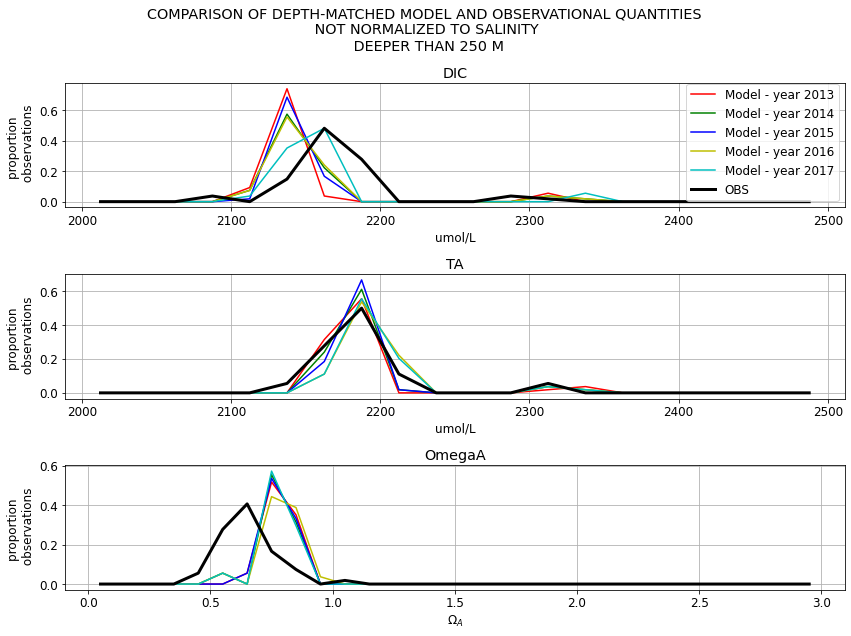

In [242]:
fig, axs = plt.subplots(3,1, figsize=(20*fact, 15*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


axs[0].plot(bin_centres,bp_MOD_2013_dic,'r-', label = 'Model - year 2013' )
axs[0].plot(bin_centres,bp_MOD_2014_dic,'g-', label = 'Model - year 2014' )
axs[0].plot(bin_centres,bp_MOD_2015_dic,'b-', label = 'Model - year 2015' )
axs[0].plot(bin_centres,bp_MOD_2016_dic,'y-', label = 'Model - year 2016' )
axs[0].plot(bin_centres,bp_MOD_2017_dic,'c-', label = 'Model - year 2017' )
axs[0].plot(bin_centres,bp_OBS_dic,'k-', linewidth = 3, label = 'OBS')

axs[1].plot(bin_centres,bp_MOD_2013_alk,'r-', label = 'Model - year 2013' )
axs[1].plot(bin_centres,bp_MOD_2014_alk,'g-', label = 'Model - year 2014' )
axs[1].plot(bin_centres,bp_MOD_2015_alk,'b-', label = 'Model - year 2015' )
axs[1].plot(bin_centres,bp_MOD_2016_alk,'y-', label = 'Model - year 2016' )
axs[1].plot(bin_centres,bp_MOD_2017_alk,'c-', label = 'Model - year 2017' )
axs[1].plot(bin_centres,bp_OBS_alk,'k-', linewidth = 3, label = 'OBS')

axs[2].plot(bin_centres_Omega,bp_MOD_2013_OmegaA,'r-', label = 'Model - year 2013' )
axs[2].plot(bin_centres_Omega,bp_MOD_2014_OmegaA,'g-', label = 'Model - year 2014' )
axs[2].plot(bin_centres_Omega,bp_MOD_2015_OmegaA,'b-', label = 'Model - year 2015' )
axs[2].plot(bin_centres_Omega,bp_MOD_2016_OmegaA,'y-', label = 'Model - year 2016' )
axs[2].plot(bin_centres_Omega,bp_MOD_2017_OmegaA,'c-', label = 'Model - year 2017' )
axs[2].plot(bin_centres_Omega,bp_OBS_OmegaA,'k-', linewidth = 3, label = 'OBS')

for i in range(0,3):
    axs[i].grid()
    axs[i].set_ylabel('proportion \n observations')
    axs[i].set_xlabel('umol/L')
    
axs[0].legend(loc='best')
axs[2].set_xlabel('$\Omega_A$')

axs[0].set_title('DIC')
axs[1].set_title('TA')
axs[2].set_title('OmegaA')

plt.suptitle('COMPARISON OF DEPTH-MATCHED MODEL AND OBSERVATIONAL QUANTITIES \n NOT NORMALIZED TO SALINITY \n DEEPER THAN 250 M')
plt.tight_layout()

## exploring effects of salinity normalization as S = 20,25,30

In [243]:
#salinity_normalized dic

# tsra_psu = sal*35/35.16504
#*35.16504/35
#convert_observational salinity to ref sal
nsal = 25

OBS['sal_rs'] = OBS['S']*35.16504/35
OBS['ndic'] = OBS['dic']/OBS['sal_rs']*nsal

MOD_ds_2013['ndic'] = MOD_ds_2013['dic']/MOD_ds_2013['sal']*nsal
MOD_ds_2014['ndic'] = MOD_ds_2014['dic']/MOD_ds_2014['sal']*nsal
MOD_ds_2015['ndic'] = MOD_ds_2015['dic']/MOD_ds_2015['sal']*nsal
MOD_ds_2016['ndic'] = MOD_ds_2016['dic']/MOD_ds_2016['sal']*nsal
MOD_ds_2017['ndic'] = MOD_ds_2017['dic']/MOD_ds_2017['sal']*nsal

OBS['sal_rs'] = OBS['S']*35.16504/35
OBS['nalk'] = OBS['alk']/OBS['sal_rs']*nsal

MOD_ds_2013['nalk'] = MOD_ds_2013['alk']/MOD_ds_2013['sal']*nsal
MOD_ds_2014['nalk'] = MOD_ds_2014['alk']/MOD_ds_2014['sal']*nsal
MOD_ds_2015['nalk'] = MOD_ds_2015['alk']/MOD_ds_2015['sal']*nsal
MOD_ds_2016['nalk'] = MOD_ds_2016['alk']/MOD_ds_2016['sal']*nsal
MOD_ds_2017['nalk'] = MOD_ds_2017['alk']/MOD_ds_2017['sal']*nsal

OBS['sal_rs'] = OBS['S']*35.16504/35
OBS['nOmegaA'] = OBS['OmegaA']/OBS['sal_rs']*nsal

MOD_ds_2013['nOmegaA'] = MOD_ds_2013['OmegaA']/MOD_ds_2013['sal']*nsal
MOD_ds_2014['nOmegaA'] = MOD_ds_2014['OmegaA']/MOD_ds_2014['sal']*nsal
MOD_ds_2015['nOmegaA'] = MOD_ds_2015['OmegaA']/MOD_ds_2015['sal']*nsal
MOD_ds_2016['nOmegaA'] = MOD_ds_2016['OmegaA']/MOD_ds_2016['sal']*nsal
MOD_ds_2017['nOmegaA'] = MOD_ds_2017['OmegaA']/MOD_ds_2017['sal']*nsal

In [244]:
nsal = 30

OBS['sal_rs'] = OBS['S']*35.16504/35
OBS['ndic'] = OBS['dic']/OBS['sal_rs']*nsal
MOD_ds_2013['ndic'] = MOD_ds_2013['dic']/MOD_ds_2013['sal']*nsal

print(np.min(OBS['ndic'][OBS['P']<25]))
print(np.max(OBS['ndic'][OBS['P']<25]))

step = 25
t_start = 1800
t_end = 5700
bin_starts = np.arange(t_start,t_end,step)
bin_ends = np.arange(t_start+step,t_end+step,step)
bin_centres_30 = np.arange(t_start+step/2,t_end + step/2 ,step)
bin_prop = np.zeros_like(bin_centres_30)

bin_prop_OBS_ndic_30 = manual_hist(OBS['ndic'][OBS['P']<25])
bp_OBS_ndic_30 = np.copy(bin_prop_OBS_ndic_30)
bin_prop_MOD_2013_ndic_30 = manual_hist(MOD_ds_2013['ndic'][OBS['P']<25])
bp_MOD_2013_ndic_30 = np.copy(bin_prop_MOD_2013_ndic_30)

nsal = 25

OBS['sal_rs'] = OBS['S']*35.16504/35
OBS['ndic'] = OBS['dic']/OBS['sal_rs']*nsal
MOD_ds_2013['ndic'] = MOD_ds_2013['dic']/MOD_ds_2013['sal']*nsal

print(np.min(OBS['ndic'][OBS['P']<25]))
print(np.max(OBS['ndic'][OBS['P']<25]))

step = 25
t_start = 1000
t_end = 5700
bin_starts = np.arange(t_start,t_end,step)
bin_ends = np.arange(t_start+step,t_end+step,step)
bin_centres_25 = np.arange(t_start+step/2,t_end + step/2 ,step)
bin_prop = np.zeros_like(bin_centres_25)

bin_prop_OBS_ndic_25 = manual_hist(OBS['ndic'][OBS['P']<25])
bp_OBS_ndic_25 = np.copy(bin_prop_OBS_ndic_25)
bin_prop_MOD_2013_ndic_25 = manual_hist(MOD_ds_2013['ndic'][OBS['P']<25])
bp_MOD_2013_ndic_25 = np.copy(bin_prop_MOD_2013_ndic_25)

nsal = 20

OBS['sal_rs'] = OBS['S']*35.16504/35
OBS['ndic'] = OBS['dic']/OBS['sal_rs']*nsal
MOD_ds_2013['ndic'] = MOD_ds_2013['dic']/MOD_ds_2013['sal']*nsal

print(np.min(OBS['ndic'][OBS['P']<25]))
print(np.max(OBS['ndic'][OBS['P']<25]))

step = 25
t_start = 1000
t_end = 5700
bin_starts = np.arange(t_start,t_end,step)
bin_ends = np.arange(t_start+step,t_end+step,step)
bin_centres_20 = np.arange(t_start+step/2,t_end + step/2 ,step)
bin_prop = np.zeros_like(bin_centres_20)

bin_prop_OBS_ndic_20 = manual_hist(OBS['ndic'][OBS['P']<25])
bp_OBS_ndic_20 = np.copy(bin_prop_OBS_ndic_20)
bin_prop_MOD_2013_ndic_20 = manual_hist(MOD_ds_2013['ndic'][OBS['P']<25])
bp_MOD_2013_ndic_20 = np.copy(bin_prop_MOD_2013_ndic_20)

1877.2624165246505
5620.311185803068
1564.3853471038756
4683.59265483589
1251.5082776831005
3746.8741238687116


1877.2624165246505
5620.311185803068


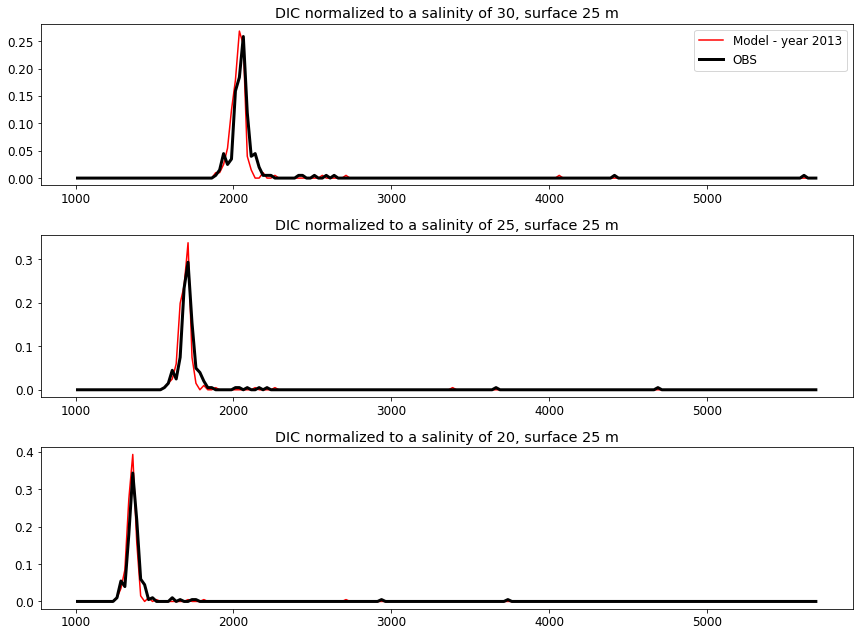

In [245]:

nsal = 30

OBS['sal_rs'] = OBS['S']*35.16504/35
OBS['ndic'] = OBS['dic']/OBS['sal_rs']*nsal
MOD_ds_2013['ndic'] = MOD_ds_2013['dic']/MOD_ds_2013['sal']*nsal

print(np.min(OBS['ndic'][OBS['P']<25]))
print(np.max(OBS['ndic'][OBS['P']<25]))

step = 25
t_start = 1000
t_end = 5700
bin_starts = np.arange(t_start,t_end,step)
bin_ends = np.arange(t_start+step,t_end+step,step)
bin_centres_30 = np.arange(t_start+step/2,t_end + step/2 ,step)
bin_prop = np.zeros_like(bin_centres_30)

bin_prop_OBS_ndic_30 = manual_hist(OBS['ndic'][OBS['P']<25])
bp_OBS_ndic_30 = np.copy(bin_prop_OBS_ndic_30)
bin_prop_MOD_2013_ndic_30 = manual_hist(MOD_ds_2013['ndic'][OBS['P']<25])
bp_MOD_2013_ndic_30 = np.copy(bin_prop_MOD_2013_ndic_30)


fig, axs = plt.subplots(3,1, figsize=(20*fact, 15*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


axs[0].plot(bin_centres_30,bp_MOD_2013_ndic_30,'r-', label = 'Model - year 2013' )
axs[0].plot(bin_centres_30,bp_OBS_ndic_30, 'k-', linewidth = 3, label = 'OBS')
axs[0].legend()
axs[0].set_title('DIC normalized to a salinity of 30, surface 25 m')
axs[1].plot(bin_centres_25,bp_MOD_2013_ndic_25,'r-', label = 'Model - year 2013' )
axs[1].plot(bin_centres_25,bp_OBS_ndic_25, 'k-', linewidth = 3, label = 'OBS')
axs[1].set_title('DIC normalized to a salinity of 25, surface 25 m')
axs[2].plot(bin_centres_20,bp_MOD_2013_ndic_20,'r-', label = 'Model - year 2013' )
axs[2].plot(bin_centres_20,bp_OBS_ndic_20, 'k-', linewidth = 3, label = 'OBS')
axs[2].set_title('DIC normalized to a salinity of 20, surface 25 m')

plt.tight_layout()

In [246]:
print(np.nanmax(OBS['ndic']))
print(np.nanmin(OBS['ndic']))
bin_prop_OBS_ndic = manual_hist(OBS['ndic'])
bp_OBS_ndic = np.copy(bin_prop_OBS_ndic)
bin_prop_MOD_2013_ndic = manual_hist(MOD_ds_2013['ndic'])
bp_MOD_2013_ndic = np.copy(bin_prop_MOD_2013_ndic)
bin_prop_MOD_2014_ndic = manual_hist(MOD_ds_2014['ndic'])
bp_MOD_2014_ndic = np.copy(bin_prop_MOD_2014_ndic)
bin_prop_MOD_2015_ndic = manual_hist(MOD_ds_2015['ndic'])
bp_MOD_2015_ndic = np.copy(bin_prop_MOD_2015_ndic)
bin_prop_MOD_2017_ndic = manual_hist(MOD_ds_2017['ndic'])
bp_MOD_2017_ndic = np.copy(bin_prop_MOD_2017_ndic)
bin_prop_MOD_2016_ndic = manual_hist(MOD_ds_2016['ndic'])
bp_MOD_2016_ndic = np.copy(bin_prop_MOD_2016_ndic)

### hist calculations


bin_prop_OBS_nalk = manual_hist(OBS['nalk'])
bp_OBS_nalk = np.copy(bin_prop_OBS_nalk)
bin_prop_MOD_2013_nalk = manual_hist(MOD_ds_2013['nalk'])
bp_MOD_2013_nalk = np.copy(bin_prop_MOD_2013_nalk)
bin_prop_MOD_2014_nalk = manual_hist(MOD_ds_2014['nalk'])
bp_MOD_2014_nalk = np.copy(bin_prop_MOD_2014_nalk)
bin_prop_MOD_2015_nalk = manual_hist(MOD_ds_2015['nalk'])
bp_MOD_2015_nalk = np.copy(bin_prop_MOD_2015_nalk)
bin_prop_MOD_2017_nalk = manual_hist(MOD_ds_2017['nalk'])
bp_MOD_2017_nalk = np.copy(bin_prop_MOD_2017_nalk)
bin_prop_MOD_2016_nalk = manual_hist(MOD_ds_2016['nalk'])
bp_MOD_2016_nalk = np.copy(bin_prop_MOD_2016_nalk)

### hist calculations


bin_prop_OBS_nOmegaA = manual_hist(OBS['nOmegaA'])
bp_OBS_nOmegaA = np.copy(bin_prop_OBS_nOmegaA)
bin_prop_MOD_2013_nOmegaA = manual_hist(MOD_ds_2013['nOmegaA'])
bp_MOD_2013_nOmegaA = np.copy(bin_prop_MOD_2013_nOmegaA)
bin_prop_MOD_2014_nOmegaA = manual_hist(MOD_ds_2014['nOmegaA'])
bp_MOD_2014_nOmegaA = np.copy(bin_prop_MOD_2014_nOmegaA)
bin_prop_MOD_2015_nOmegaA = manual_hist(MOD_ds_2015['nOmegaA'])
bp_MOD_2015_nOmegaA = np.copy(bin_prop_MOD_2015_nOmegaA)
bin_prop_MOD_2017_nOmegaA = manual_hist(MOD_ds_2017['nOmegaA'])
bp_MOD_2017_nOmegaA = np.copy(bin_prop_MOD_2017_nOmegaA)
bin_prop_MOD_2016_nOmegaA = manual_hist(MOD_ds_2016['nOmegaA'])
bp_MOD_2016_nOmegaA = np.copy(bin_prop_MOD_2016_nOmegaA)

5620.311185803068
1877.2624165246505
